Employee Attrition

    - Is there ways to find out if an employee will leave an organization? 
    - What are the factors that lead to higher employee attrition rate?
    - what are the factors that lead to employee attrition?


Exploratory Data Analysis (EDA)
 - Univariate  Analysis
    - Missing values 
    - Normality check
    - Categorical to Numerical data conversion (Encoding)
    - outliers detection
 - Bivariate Analysis
    - correlation check
    - outliers detection
 - Feature Engineering
 - Modeling & parameter evaluation


In [1]:
# df = pd.read_sql_query(sql = 'select * from TableA;', con = conn)

## factors that lead an employee attrition
- work-life balance
- salary
- travel oppertunities
- hike/promotion
- distance from home to office 
- technology/ skill upgrad
- open oppertunities
- relationship with boss
- work envionment
- duration within an organisation
- job roles
- onsite
- overtime
- more pressure
- quality of work
- work satisfied
- 

In [2]:
## import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# UDF
from function import metrices_calculation

In [3]:
#Read data 
df = pd.read_csv('Employee-Attrition.csv')
df.head() #top 5 raws

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.tail() #bottem 5 row

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [5]:
df.shape #diamination check (1470 raws and 35columns ) 

(1470, 35)

In [6]:
df.columns # display the columns names 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.Attrition.unique() #target variable 

array(['Yes', 'No'], dtype=object)

In [8]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
# EDA 
# univariate
# Missing values handling 
df.isnull().sum()
### How do we handle missing values?
#  - dropping (rows/columns)
#  - filling (mean/median/mode/random values(between +-2sigma (standard deviation)))
#  - filling with a predicitive model

### if missing values in rows; should we drop all the rows with any missing values? (NO/depends)
## 1) could discard significant columns info
## 2) could discard target records info  

### column - wise
## 1) percentage of missing of missing values in each column
## 2) column significant wrt. target 
## 3) if missing values above or equal to 70%, drop the column
###  a) if below 70%, what are the cases possible?
#### if continuous: mean|median? if percentage of misssing values is minimal then only, use mean or median approach else stick to predictive model or filling with ransom numbers between 2 standard deviations. 
#### if categrorical/numerical discrete: mode? (defination of outliers in categorical data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Missing values
# Normality check
# Categorical to Numerical data conversion (Encoding)
# outliers detection
# Bivariate Analysis
# correlation check
# outliers detection

In [11]:
##  Normality check
numerical_features = df.select_dtypes(include = np.number).columns
categorical_features = df.drop('Attrition', axis = 1).select_dtypes(include=np.object).columns
print(numerical_features)
print(categorical_features)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


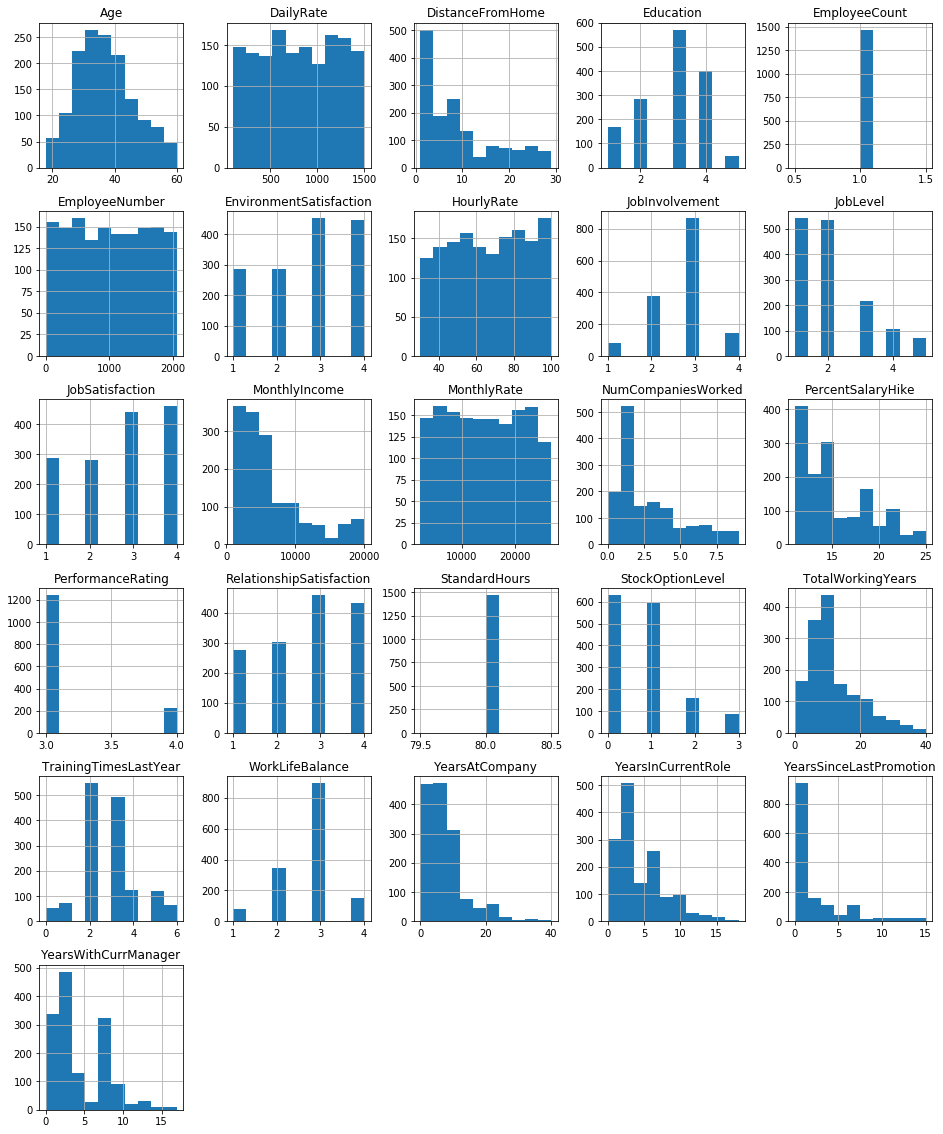

In [12]:
df[numerical_features].hist(figsize=(16,20))
plt.show()

In [13]:
df.StandardHours.unique()

array([80], dtype=int64)

In [14]:
df.EmployeeCount.unique()

array([1], dtype=int64)

In [15]:
categorical_features

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

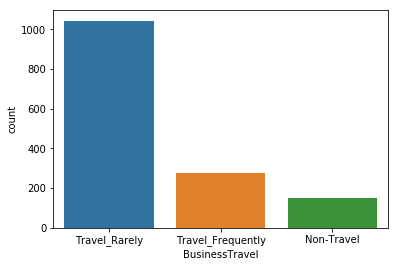

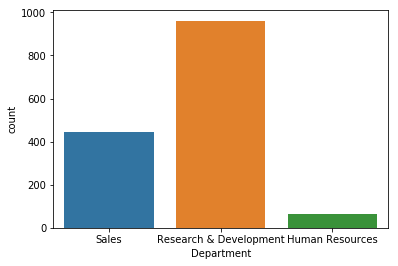

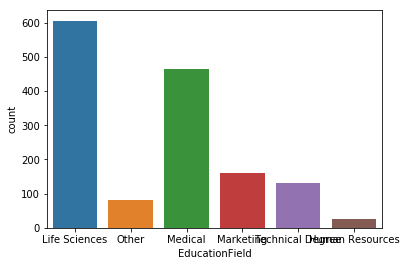

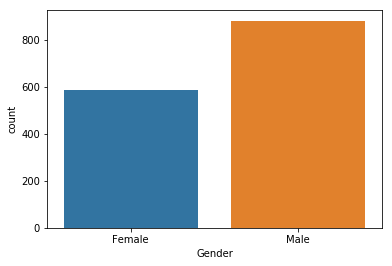

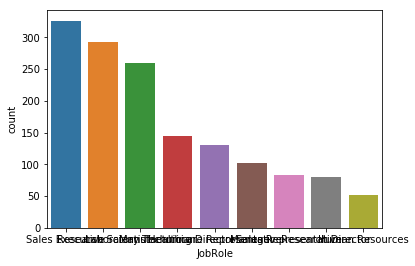

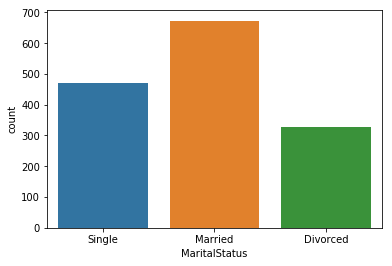

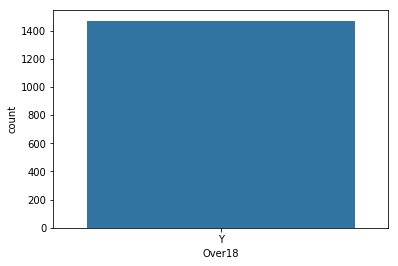

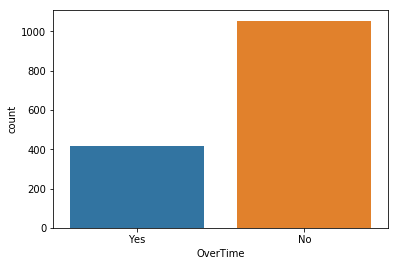

In [16]:
for each in categorical_features:
    sns.countplot(each, data = df)
    plt.show()

### columns to be dropped
    'EmployeeNumber' => this is nominal data 
    'StandardHours' => zero variance
    'EmployeeCount'=> zero variance
    'DailyRate', 'HourlyRate' & 'MonthlyRate' should be correlated (further analysis required)
    'Over18' => zero variance

In [17]:
# dropping columns
df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'], axis = 1, inplace = True)

In [18]:
df.shape

(1470, 31)

In [19]:
#####'Department'
100/1400 # not outlier


0.07142857142857142

In [20]:
#### EducationField
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [21]:
for each in df.EducationField.unique():
    print(each, df[df.EducationField==each].shape[0]/df.shape[0] )

Life Sciences 0.4122448979591837
Other 0.055782312925170066
Medical 0.31564625850340133
Marketing 0.10816326530612246
Technical Degree 0.08979591836734693
Human Resources 0.018367346938775512


In [22]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [23]:
### JobRole (Find out JobRole which has features_stats closure to "Human Resources")
for each in df.JobRole.unique():
    print(each,df[df.JobRole==each].shape[0]/df.shape[0])

Sales Executive 0.2217687074829932
Research Scientist 0.19863945578231293
Laboratory Technician 0.1761904761904762
Manufacturing Director 0.09863945578231292
Healthcare Representative 0.0891156462585034
Manager 0.06938775510204082
Sales Representative 0.05646258503401361
Research Director 0.05442176870748299
Human Resources 0.03537414965986395


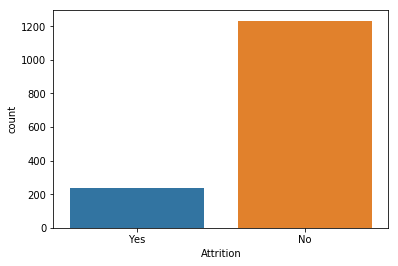

In [24]:
#### what is the defination of imbalanced dataset?
### Is the data imbalanced? 
sns.countplot('Attrition',data = df) # Target variable
plt.show()

In [25]:
#~ 200/1400 (cases of 'Yes')
## How to handle imbalanced dataset? using under-sampling/over-sampling 
# 2-> YES (Minority class)
# 98-> NO (Majority class)
# SMOTE
# classimblearn (explroxe)

In [26]:
#### Categorical to Numerical data conversion (Encoding)
categorical_features

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

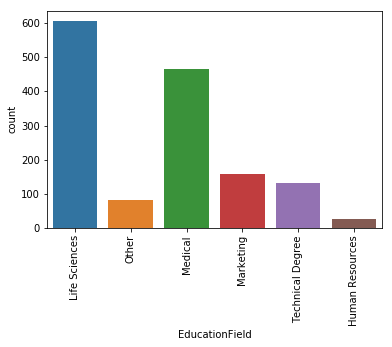

In [27]:
var = 'EducationField'
sns.countplot(var, data = df) # label encoding
plt.xticks(rotation=90)
plt.show()

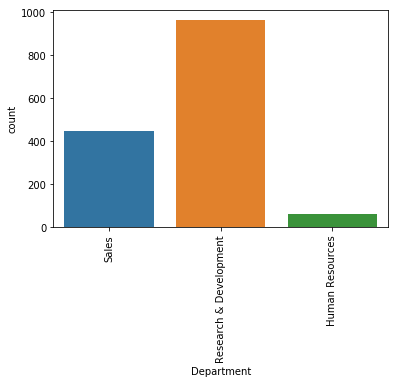

In [28]:
var = 'Department'
sns.countplot(var, data=df)
plt.xticks(rotation=90)
plt.show()

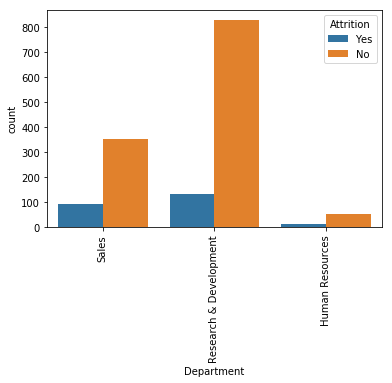

In [29]:
var = 'Department'
sns.countplot(var, hue= 'Attrition',data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [31]:
df[df.Department=='Research & Development']['JobRole'].unique()

array(['Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative',
       'Research Director', 'Manager'], dtype=object)

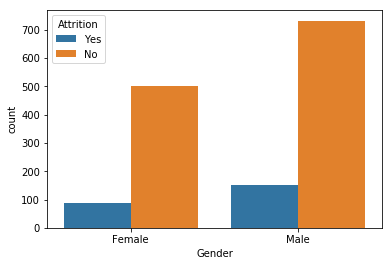

In [32]:
var = 'Gender'
sns.countplot(var, hue="Attrition", data =df)
plt.show()

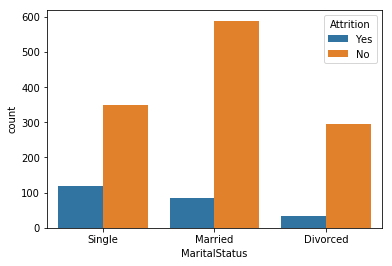

In [33]:
var = 'MaritalStatus'
sns.countplot(var, hue= 'Attrition',data=df)
plt.show()

In [34]:
# 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
#        'MaritalStatus', 'OverTime'
# OHE

In [35]:
# ## 
# data -> 
# 1.nominal data (OHE)
# 2. interval/rank data (label encoding)


In [36]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Missing values
# Normality check
# Categorical to Numerical data conversion (Encoding)
# outliers detection
# Bivariate Analysis
# correlation check
# outliers detection

In [37]:
numerical_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
        'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

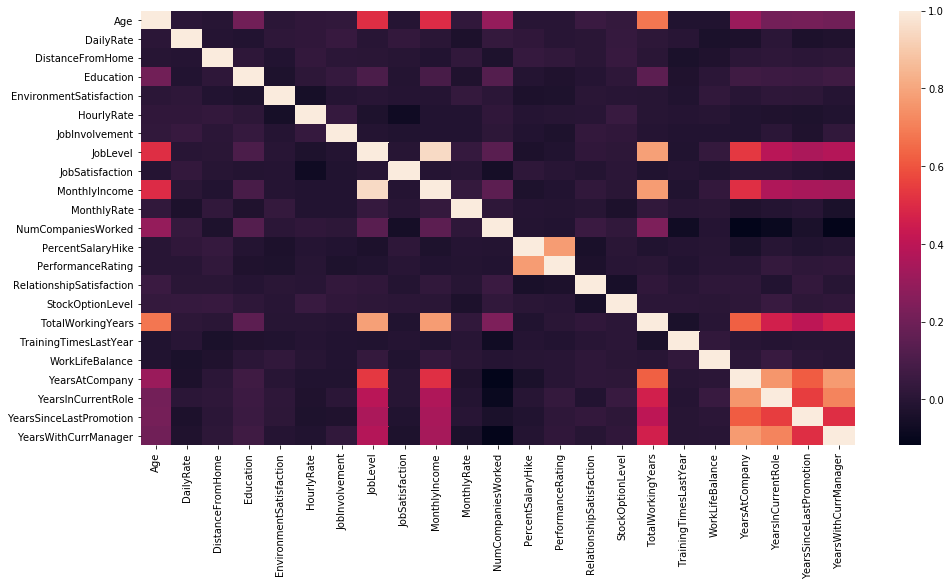

In [39]:
#### correlation check

plt.figure(figsize=(16,8))
sns.heatmap(df[numerical_features].corr(),)
plt.show()

In [40]:
### key insights:

In [41]:
df.PerformanceRating.unique()

array([3, 4], dtype=int64)

In [42]:
## 
print(df[df.Attrition=='Yes']['PerformanceRating'].unique())
print(df[df.Attrition=='No']['PerformanceRating'].unique())

[3 4]
[4 3]


In [43]:
# numerical_features

In [44]:
list_num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                    'JobInvolvement','MonthlyIncome','MonthlyRate']

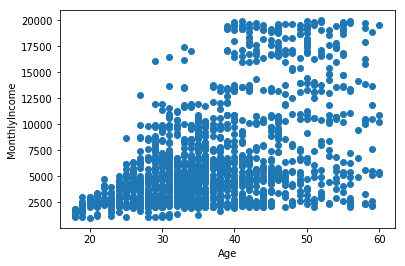

In [45]:
plt.scatter(df['Age'],df['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

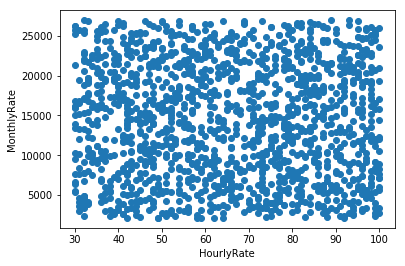

In [46]:
plt.scatter(df['HourlyRate'],df['MonthlyRate'])
plt.xlabel('HourlyRate')
plt.ylabel('MonthlyRate')
plt.show()

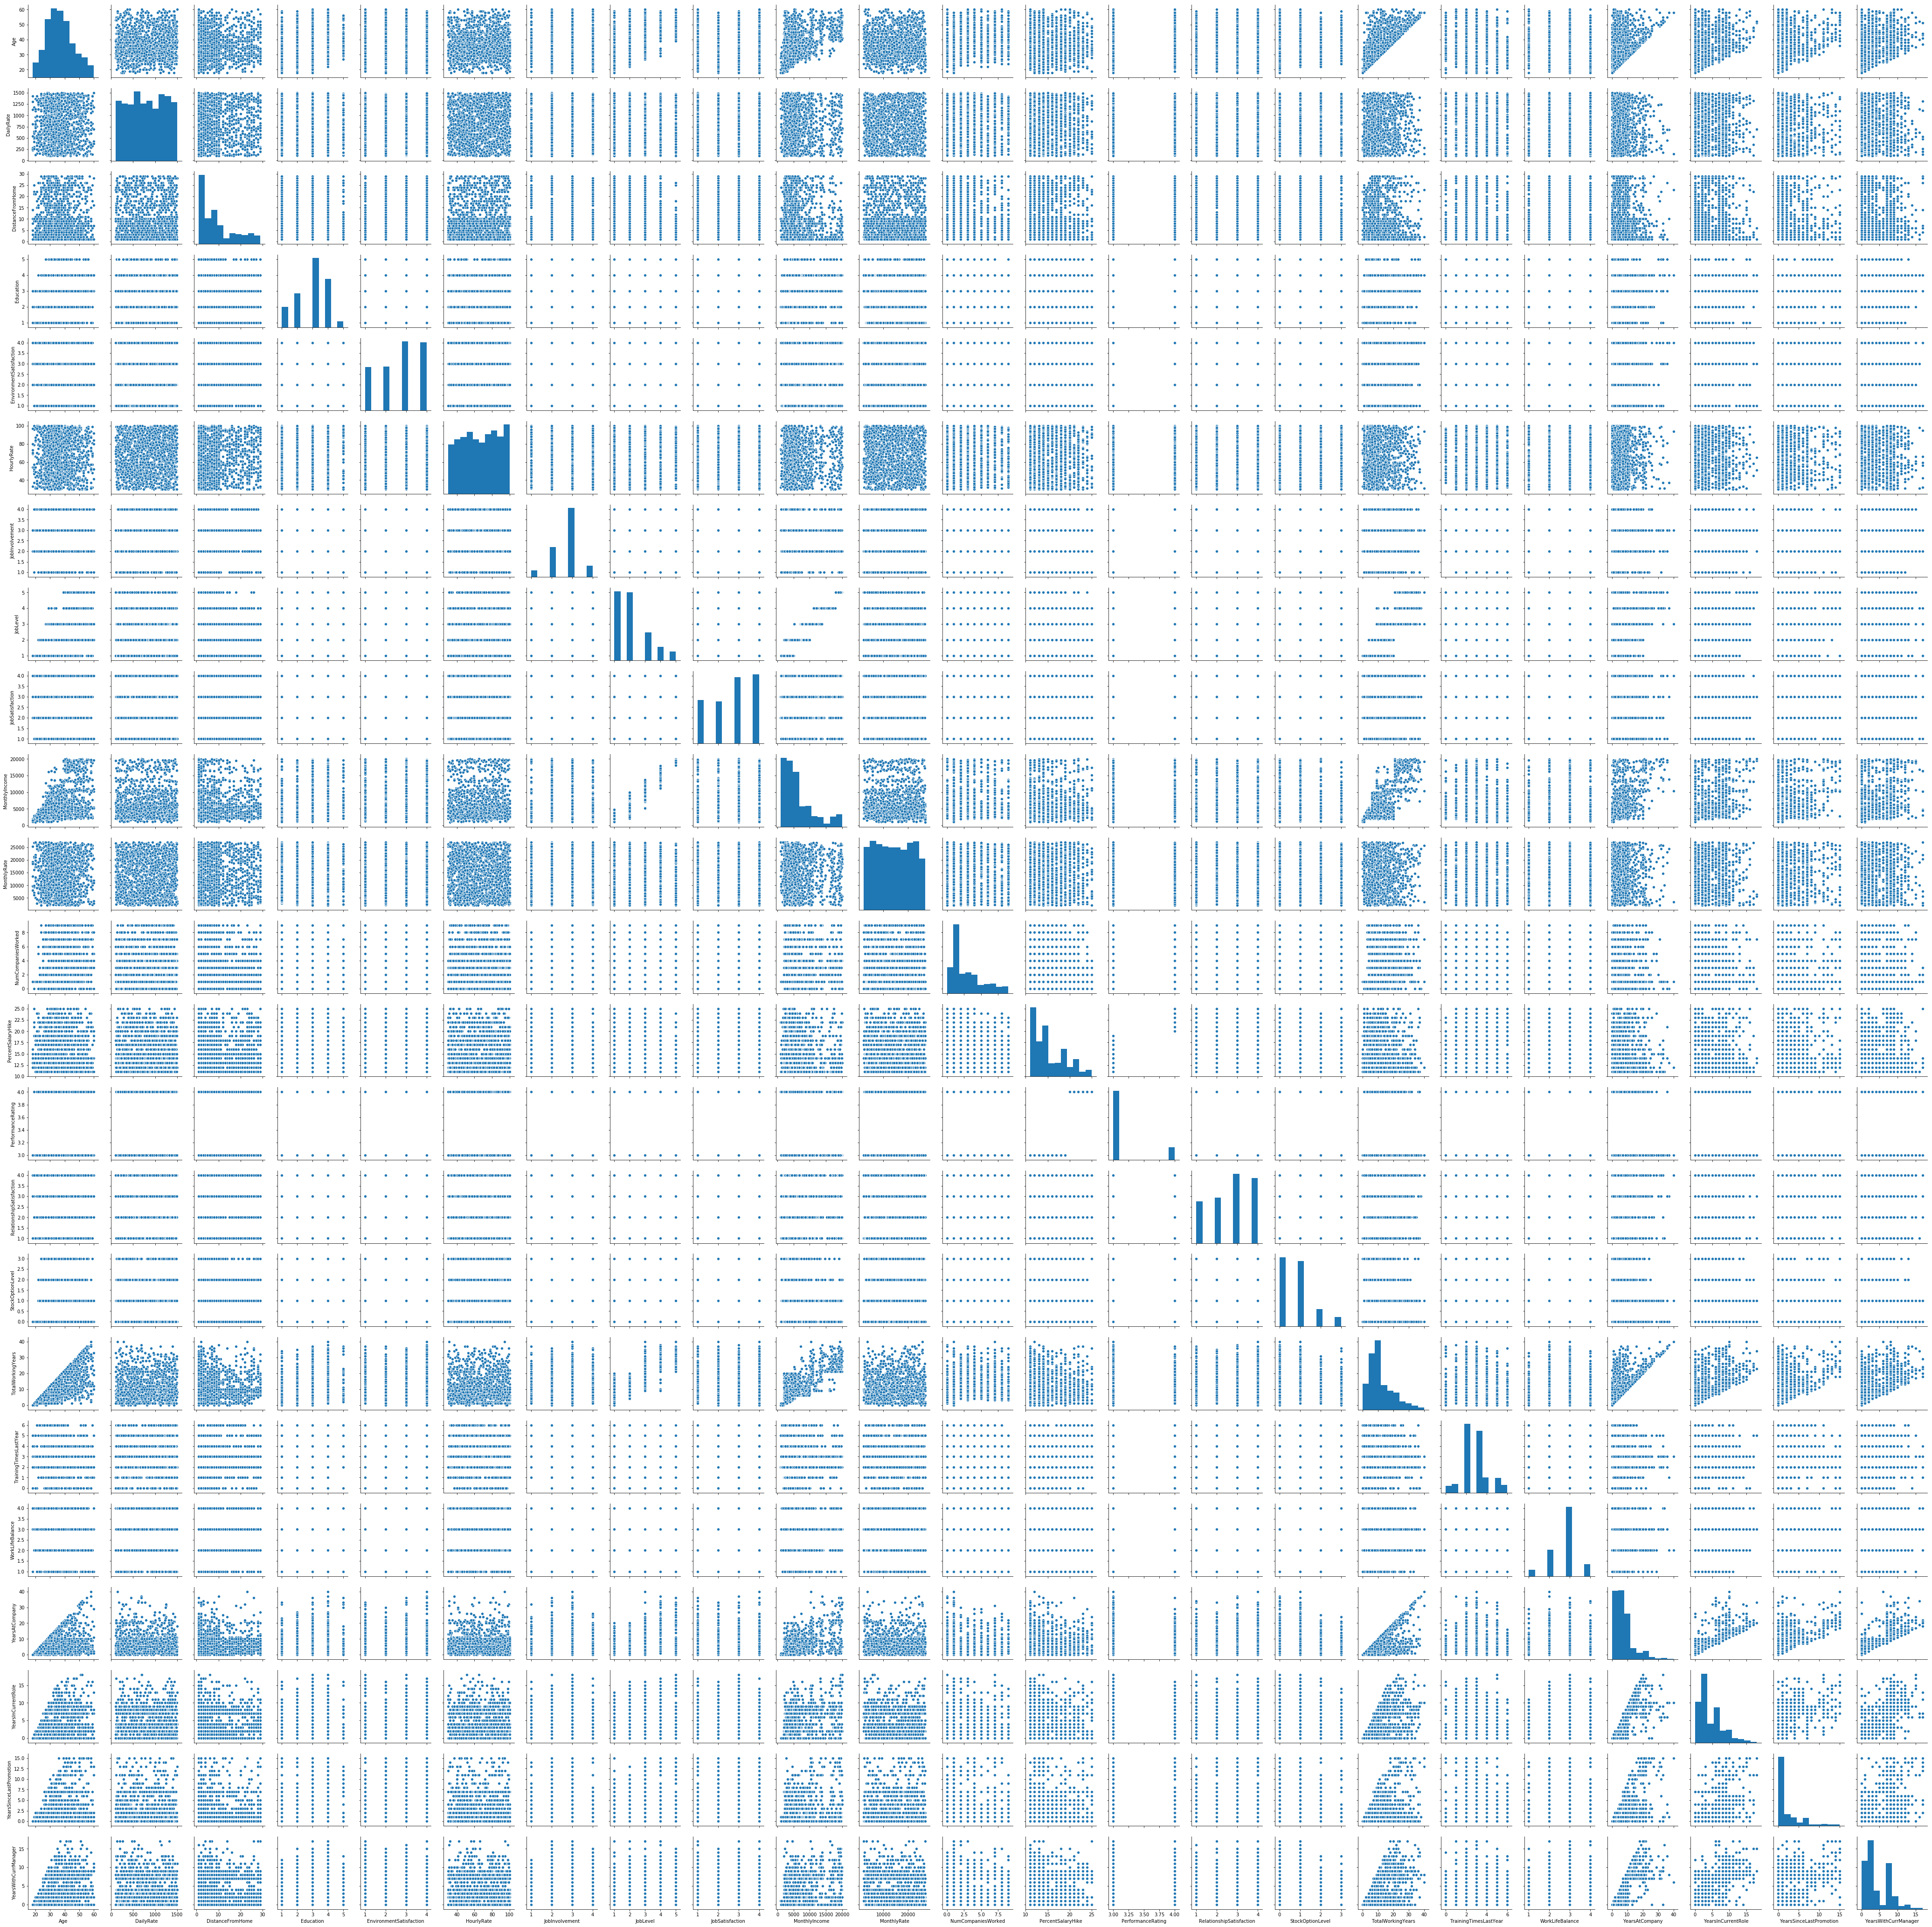

In [47]:
sns.pairplot(df[numerical_features]) 

In [48]:
### 

# Target Encoding (YES->1, 'NO'->0)

df['Attrition'] = df.Attrition.map({'Yes':1,'No':0})
df = pd.get_dummies(df) ## OHE encoding

In [49]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  JobRole_Manufacturing Director  \
0                4  ...                               0   
1                2  ...                               0   
2                3  ...                               0   
3                3  ...                               0   
4                2  ...                               0   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           1   
4                          0                           0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   
3                       0                      1                     0   
4                       0                      1                     0   

   OverTime_No  OverTime_Yes  
0            0             1  
1            1             0  
2            0             1  
3            0             1  
4            1             0  

[5 rows x 52 columns]

In [50]:
## import sklearn functions
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, RidgeClassifierCV,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [51]:
### data splitting into features & target
X = df.drop(['Attrition'], axis = 1)
y = df.Attrition

In [52]:
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0  
2                      0                     1            0             1  
3                      1                     0            0             1  
4                      1                     0            1             0  

[5 rows x 51 columns]

In [54]:
df.Attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### 
1. Why scaling is important?
2. Is scaling important always?
3. should it be done on features or target or both?

In [56]:
## scaling data
scaler = StandardScaler()
scaler.fit(X, y)
X_ = scaler.transform(X)

In [57]:
print(X_[:2])

[[ 0.4463504   0.74252653 -1.01090934 -0.89168825 -0.66053067  1.38313827
   0.37967213 -0.05778755  1.15325359 -0.10834951  0.72601994  2.12513592
  -1.1505541  -0.42623002 -1.58417824 -0.93201439 -0.42164246 -2.17198183
  -2.49382042 -0.16461311 -0.0632959  -0.67914568  0.24583399 -0.33709993
  -0.48185865  0.63984058 -0.21160368 -1.37405084  1.51524392 -0.13678823
   1.19404463 -0.34825488 -0.67914108 -0.24305927 -0.31409347  1.22474487
  -1.22474487 -0.3127846  -0.1914977  -0.46246387 -0.27305934 -0.33080804
  -0.23990406 -0.49787324  1.87328654 -0.24462499 -0.53487311 -0.91892141
   1.45864991 -1.59174553  1.59174553]
 [ 1.32236521 -1.2977746  -0.14714972 -1.86842575  0.25462493 -0.24067677
  -1.02616674 -0.05778755 -0.66085318 -0.29171859  1.48887614 -0.67804939
   2.12930601  2.34615106  1.19143799  0.24198831 -0.1645114   0.15570708
   0.33809616  0.48850773  0.76499762 -0.36871529  0.80654148 -0.33709993
   2.07529738 -1.5628893  -0.21160368  0.72777511 -0.65995975 -0.13678823

In [58]:
### splitting data into train and validation/test sets by 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape,y_train.shape )
print(X_test.shape,y_test.shape)

(1176, 51) (1176,)
(294, 51) (294,)


In [59]:
### K-fold cross validation
# 100, K=5
# S1 S2 S3 S4 S5
# 20 20 20 20 20

# 1st iter: S1-> validation set: [S2:S5]-> training set => Accuracy1 = 50
# 2nd iter: S2-> validation set: [Rem]-> training set => A2 = 90
# 3rd iter: S3-> validation set: [Rem]-> training set => A3 = 89
# ...
# 5th iter: S5-> validation set: [Rem]-> training set => A5 = 78

In [60]:
# #### limitations of deep layer
#      - pre-requisite of large dataset 
    
    
# 1. simplity (model complexity is less) 
#  - Linear/Logistic regression (pros:simple model, works well on less data ;cons: starts to perform well with high number of categorical/non-linear data, fails with outliers)
#  - Tree based models(CART, RandomForest/(GradientBoosting/XgBoost)) (Pros:works with non-linearity data,works with outliers ;cons: overfitting,highly instable)
#  - SVM (Pros:can work on mix/inseperable/non-linear/linear data; Drawbacks: computationally expensive)
#  - KNN 
#  - NaiveBased 
#  - DL (Pros: Gives highest accuracy, works with unstructure data; cons: pre-requisite of large dataset )       

In [61]:
# ### features: 10
# 10=> LR: 78; RF: 80
# 9=>  LR: 77; RF: 80 +- large_change   (78)      

In [62]:
# prunning 
# l3: 6+5+2 = 13 

In [63]:
### How to judge our accuracy??

In [64]:
model_estimators = [LogisticRegression, RidgeClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC]
model_names = ['LogisticRegression','RidgeClassifier', 'RandomForest','GradientBoosting','SVC']

In [65]:
### 
def model(est, name, trainX, trainy):
    scores = cross_val_score(estimator = est(), X = trainX, y = trainy, scoring = 'accuracy', cv = 5, n_jobs  = -1)
    print(scores)
    print('{}: Average scores: {}, standard deviation: {}'.format(name, round(np.mean(scores),5),round(np.std(scores),5)))

In [67]:
for n,m in zip(model_names, model_estimators):
    model(m,n, X_train,y_train)

[0.86016949 0.88085106 0.89361702 0.88510638 0.89361702]
LogisticRegression: Average scores: 0.88267, standard deviation: 0.01229
[0.86016949 0.86382979 0.87234043 0.86382979 0.87234043]
RidgeClassifier: Average scores: 0.8665, standard deviation: 0.00495
[0.83898305 0.85957447 0.84255319 0.85106383 0.85531915]
RandomForest: Average scores: 0.8495, standard deviation: 0.0077
[0.84322034 0.88510638 0.86808511 0.87659574 0.84255319]
GradientBoosting: Average scores: 0.86311, standard deviation: 0.01737
[0.86016949 0.85957447 0.86808511 0.85957447 0.87659574]
SVC: Average scores: 0.8648, standard deviation: 0.00672


In [68]:
# High average score|least standard deviation

In [69]:
### 
def model_(est, name, trainX, trainy, testX, testy):
    model_ = est().fit(trainX,trainy) 
    ypred_train = model_.predict(trainX)
    ypred_test = model_.predict(testX)
#     precision, recall, fscore, = precision_recall_fscore_support(trainy, ypred_train)
    print('{}:'.format(name))
    print('Train: precision={} recall={}, Test: precision={} recall={}'.format(round(precision_score(trainy, ypred_train)*100,3),
                                                                                 round(recall_score(trainy, ypred_train)*100,3),
                                                                                  round(precision_score(testy, ypred_test)*100,3),
                                                                                  round(recall_score(testy, ypred_test)*100,3)))
          

In [70]:
for n,m in  zip(model_names, model_estimators):
    model_(m,n, X_train,y_train,X_test,y_test )

LogisticRegression:
Train: precision=80.672 recall=50.526, Test: precision=61.538 recall=34.043
RidgeClassifier:
Train: precision=88.0 recall=23.158, Test: precision=76.923 recall=21.277
RandomForest:
Train: precision=100.0 recall=90.0, Test: precision=45.455 recall=10.638
GradientBoosting:
Train: precision=100.0 recall=75.263, Test: precision=66.667 recall=21.277
SVC:
Train: precision=98.901 recall=47.368, Test: precision=90.909 recall=21.277


<!-- ![](attachment:image.png) -->
#### precision,recall
<img src='screenshot.jpg' style="width:500px;height:350px" />

In [72]:
#### GridSearchCV is used for hyper-parameters tunning

In [73]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
#### hyper-parameters of random forest model are: n_estimators,max_depth,min_samples_split,max_leaf_nodes,max_features

In [75]:
## model to used (assumed)
model_rf = RandomForestClassifier(oob_score=True, random_state=42, min_samples_split = 5,)

## parameters to be tunned
params = {'n_estimators':range(100,200,5),
         'max_depth':range(2,5,1)}
gs = GridSearchCV(estimator=model_rf, param_grid=params,scoring='accuracy', n_jobs=-1, cv = 3)
gs.fit(X_train, y_train)
tunned_results = pd.DataFrame(gs.cv_results_).sort_values(by = 'mean_test_score', ascending = False )

In [78]:
tunned_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
53       0.547547      0.044462         0.045982        0.005541   
40       0.320858      0.009020         0.028229        0.002325   
41       0.346880      0.011711         0.030060        0.001714   
59       0.506379      0.028576         0.031534        0.004239   
58       0.608258      0.011347         0.043808        0.008966   
57       0.597746      0.006439         0.044732        0.001277   
56       0.591941      0.025744         0.043111        0.003342   
55       0.585959      0.007332         0.043017        0.002948   
54       0.721410      0.009936         0.048909        0.003875   
52       0.498567      0.020497         0.040168        0.003972   
51       0.507191      0.010031         0.039376        0.001453   
50       0.481044      0.019332         0.038904        0.001043   
49       0.479062      0.004036         0.044890        0.006156   
42       0.381743      0.004899         0.032488        0.005582   
43       0.400800      0.019729         0.028484        0.002070   
44       0.397294      0.014944         0.031480        0.003655   
46       0.417278      0.005387         0.039132        0.002634   
45       0.411732      0.014520         0.032293        0.003095   
47       0.438555      0.008066         0.034954        0.001448   
48       0.468357      0.005981         0.034990        0.002753   
39       0.596776      0.007577         0.050443        0.009055   
37       0.566757      0.011072         0.044078        0.003011   
29       0.483629      0.018544         0.051503        0.013462   
38       0.575412      0.021538         0.050052        0.006796   
36       0.542441      0.010117         0.042090        0.004522   
35       0.545740      0.003363         0.041577        0.002915   
34       0.524118      0.018058         0.041762        0.002114   
33       0.513206      0.009233         0.040073        0.000525   
32       0.482515      0.000375         0.039642        0.001132   
30       0.477886      0.021774         0.042747        0.003347   
28       0.422362      0.007191         0.037385        0.009927   
20       0.325663      0.033797         0.023888        0.001377   
27       0.422594      0.017086         0.031635        0.002571   
26       0.414775      0.015599         0.031458        0.001151   
25       0.392479      0.007021         0.031303        0.003126   
24       0.376510      0.006041         0.034930        0.005033   
23       0.374074      0.002920         0.032129        0.001154   
21       0.318355      0.008799         0.026034        0.002314   
31       0.503181      0.006209         0.039894        0.006726   
22       0.344810      0.012453         0.033883        0.007825   
19       0.583836      0.007347         0.046013        0.003900   
18       0.568208      0.022807         0.043932        0.001249   
17       0.524603      0.009379         0.044110        0.002249   
4        0.399015      0.065205         0.046575        0.012710   
6        0.489765      0.045733         0.031175        0.003138   
5        0.409590      0.047439         0.040484        0.007506   
1        0.379757      0.094869         0.025458        0.002948   
3        0.412158      0.055211         0.040780        0.013123   
2        0.386352      0.076574         0.036858        0.012854   
8        0.412031      0.002550         0.035036        0.002217   
7        0.458418      0.040900         0.035235        0.002173   
15       0.530594      0.020205         0.050425        0.005432   
9        0.412578      0.018340         0.038966        0.002760   
10       0.460802      0.006000         0.037351        0.003302   
11       0.451051      0.018093         0.038547        0.002039   
12       0.467297      0.007971         0.039809        0.002533   
13       0.473154      0.019043         0.044833        0.004975   
14       0.483022      0.008497         0.044911        0.00

In [79]:
# gs.best_estimator_ # returns estimators with best parameters sets
# gs.best_params_  # displays best parameters values
# gs.best_score_ # display best score as per scoring parameter in GridSearchCV

In [80]:
#### All the above steps can be pipelined to excute in sequence once the model is decided by using PipeLine

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipline = Pipeline(steps = [('scaler',StandardScaler()),
                 ('model',RandomForestClassifier())])
pipline.fit(X_train, y_train)
pred_tr = pipline.predict(X_train)
pred_te = pipline.predict(X_test)

In [83]:
## train metrics
metrices_calculation(y_train, pred_tr)

print('\n')

## test metrics
metrices_calculation(y_test, pred_te)

Accuracy:0.9855442176870748
 precision:1.0
 recall:0.9105263157894737
 confusion matrix:[[986   0]
 [ 17 173]]


Accuracy:0.8333333333333334
 precision:0.42857142857142855
 recall:0.1276595744680851
 confusion matrix:[[239   8]
 [ 41   6]]


In [84]:
pipline = Pipeline(steps = [('scaler',Normalizer()),
                 ('model',RandomForestClassifier())])
pipline.fit(X_train, y_train)
pred_tr = pipline.predict(X_train)
pred_te = pipline.predict(X_test)

In [85]:
## train metrics
metrices_calculation(y_train, pred_tr)

print('\n')

## test metrics
metrices_calculation(y_test, pred_te)

Accuracy:0.9812925170068028
 precision:1.0
 recall:0.8842105263157894
 confusion matrix:[[986   0]
 [ 22 168]]


Accuracy:0.8537414965986394
 precision:0.6428571428571429
 recall:0.19148936170212766
 confusion matrix:[[242   5]
 [ 38   9]]


In [86]:
pipline = Pipeline(steps = [('scaler',Normalizer()),
                 ('model',LogisticRegression())])
pipline.fit(X_train, y_train)
pred_tr = pipline.predict(X_train)
pred_te = pipline.predict(X_test)

In [87]:
## train metrics
metrices_calculation(y_train, pred_tr)

print('\n')

## test metrics
metrices_calculation(y_test, pred_te)

Accuracy:0.8826530612244898
 precision:0.8939393939393939
 recall:0.3105263157894737
 confusion matrix:[[979   7]
 [131  59]]


Accuracy:0.8707482993197279
 precision:0.7647058823529411
 recall:0.2765957446808511
 confusion matrix:[[243   4]
 [ 34  13]]


In [88]:
pipline = Pipeline(steps = [('scaler',Normalizer()),
                 ('model',RidgeClassifier())])
pipline.fit(X_train, y_train)
pred_tr = pipline.predict(X_train)
pred_te = pipline.predict(X_test)

In [89]:
## train metrics
metrices_calculation(y_train, pred_tr)

print('\n')

## test metrics
metrices_calculation(y_test, pred_te)

Accuracy:0.8690476190476191
 precision:0.9285714285714286
 recall:0.20526315789473684
 confusion matrix:[[983   3]
 [151  39]]


Accuracy:0.8707482993197279
 precision:0.9090909090909091
 recall:0.2127659574468085
 confusion matrix:[[246   1]
 [ 37  10]]
